# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

In [125]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [25]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	

* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

Text(0.5, 1.0, 'Линейная диаграмма с параметром hue=age groups')

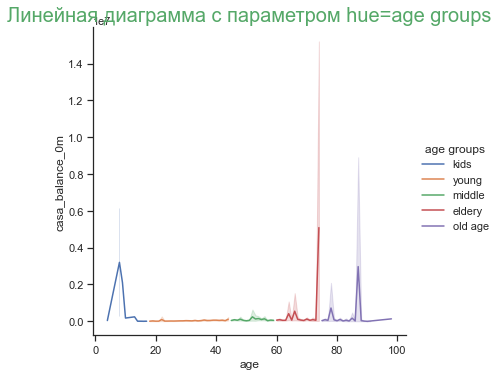

In [27]:
Age_Mapping = dict()
for age in range(100):
    if age <18:
        Age_Mapping[age] = 'kids'
    elif age >= 18 and age <=44:
        Age_Mapping[age] = 'young'
    elif age >= 45 and age <=59:
        Age_Mapping[age] = 'middle'   
    elif age >= 60 and age <=74:
        Age_Mapping[age] = 'eldery'     
    elif age >= 75: 
        Age_Mapping[age] = 'old age'  

df['age groups'] = df['age'].map(Age_Mapping)
age_order = ['kids', 'young', 'middle', 'eldery', 'old age']
sns.relplot(x='age', y='casa_balance_0m', hue='age groups', hue_order=age_order,
            data=df, kind='line')
plt.title('Линейная диаграмма с параметром hue=age groups', size=20, color='g')

Text(0.5, 1.0, 'Линейная диаграмма')

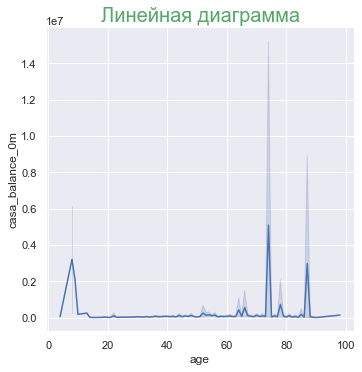

In [28]:
sns.set(style='darkgrid')  

sns.relplot(x='age', y='casa_balance_0m', data=df, kind='line')
plt.title('Линейная диаграмма',size=20, color='g')

Text(0.5, 1.0, 'Линейная диаграмма c параметром hue=gender')

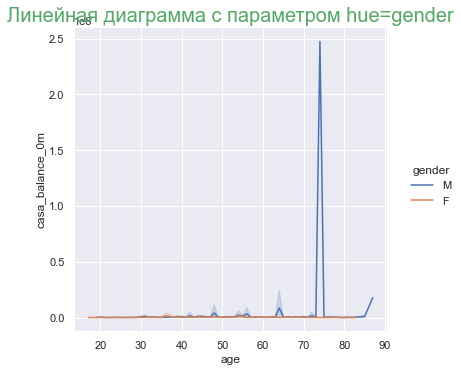

In [170]:
df1=df.dropna()
sns.relplot(x='age', y='casa_balance_0m', hue='gender', hue_order=['М', 'F'],
            data=df1, kind='line')
plt.title('Линейная диаграмма c параметром hue=gender', size=20, color='g')

### Создание длинного датафрейма из датафрейма широкой формы

* В широкой форме для каждого продукта есть отдельная колонка
* В длинной форме все продукты схлопываются в одну, за счет этого таблица становится менее широкй и более длинной

In [33]:
lt = pd.melt(df, var_name='item', value_name='values',
            id_vars=['age','gender','city_type', 'full_mob', 'age groups'])
lt

,age,gender,city_type,full_mob,age groups,item,values
0,71,NaN,<100,103,eldery,ml_balance,0.000000
1,49,NaN,Mega,81,middle,ml_balance,0.000000
2,56,NaN,Mega,81,middle,ml_balance,0.000000
3,47,NaN,Mega,81,middle,ml_balance,0.000000
4,74,NaN,Mega,81,eldery,ml_balance,0.000000
...,...,...,...,...,...,...,...
1199995,57,F,<100,97,middle,nbi,13775.933155
1199996,58,F,Mega,34,middle,nbi,8247.466438
1199997,34,М,1M+,21,young,nbi,1973.128710
1199998,43,М,<100,52,young,nbi,5101.543269


#### Линейные диаграммы из датафрейма длинной формы

<ipython-input-186-1ea103db0ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd['values'] = prd['values'].apply(lambda x: 0 if np.isnan(x) or x == 0.0 else 1)


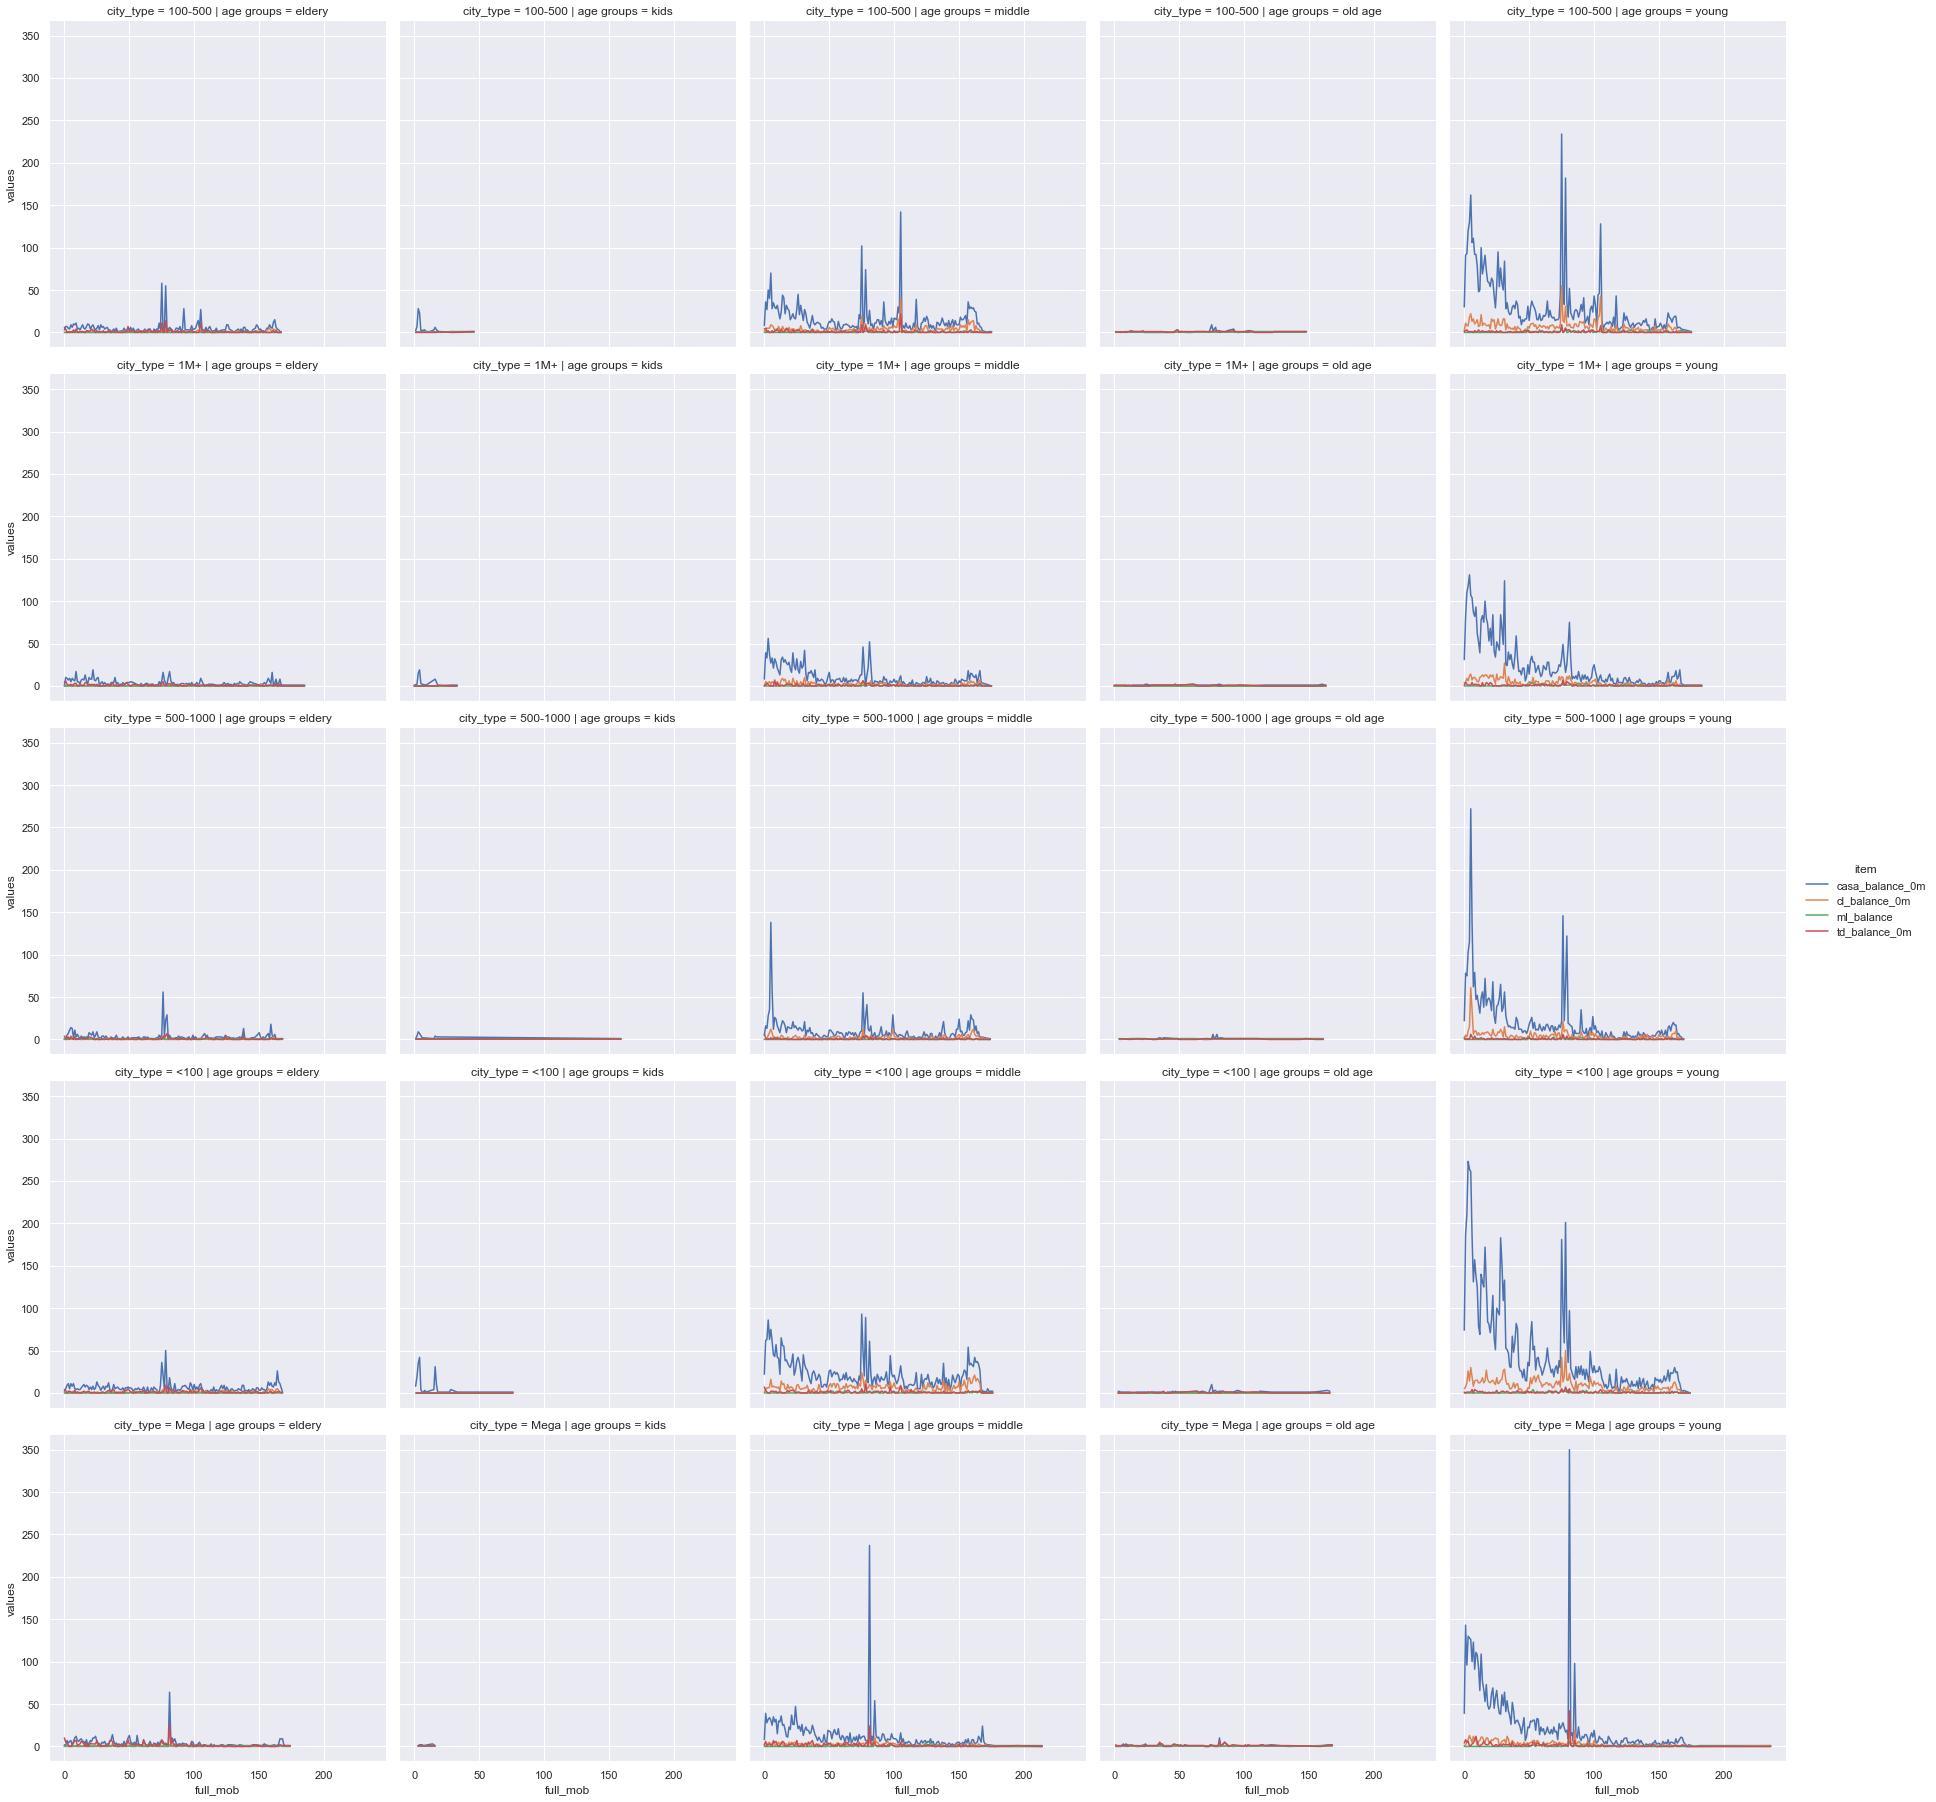

In [186]:
prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]
prd['values'] = prd['values'].apply(lambda x: 0 if np.isnan(x) or x == 0.0 else 1)
prd = prd.groupby(['full_mob', 'age groups', 'city_type', 'item'])['values'].sum().reset_index()

g = sns.relplot(
    x='full_mob', 
    y='values', 
    data=prd, 
    kind='line', 
    hue='item',
    row='city_type',
    col='age groups')

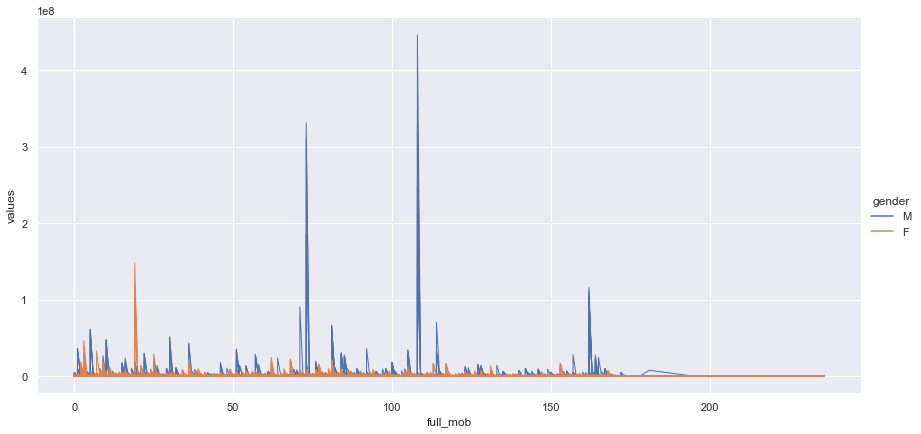

In [187]:
# одна линия для каждого продукта
sns.relplot(
            x='full_mob',
            y='values',  
            hue='gender', 
            data=lt, 
            kind='line',
            units="item", 
            estimator=None, 
            lw=1, 
            height=6, 
            aspect=2);

### Scatterplot()

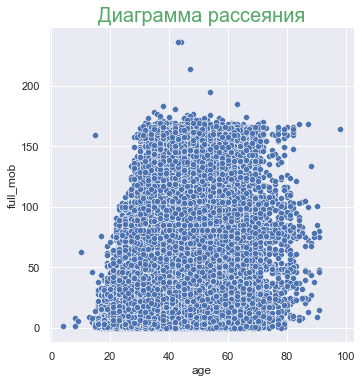

In [188]:
sns.relplot(x='age', y='full_mob', data=lt, kind='scatter')
plt.title('Диаграмма рассеяния', size=20, color='g');

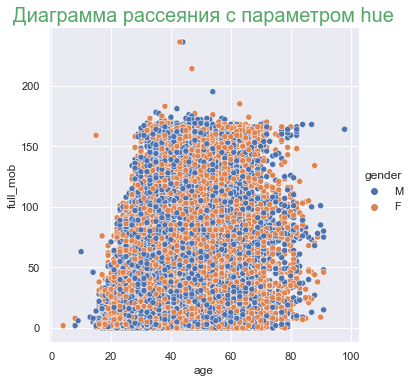

In [194]:
sns.relplot(x='age', y='full_mob', hue='gender', data=lt)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

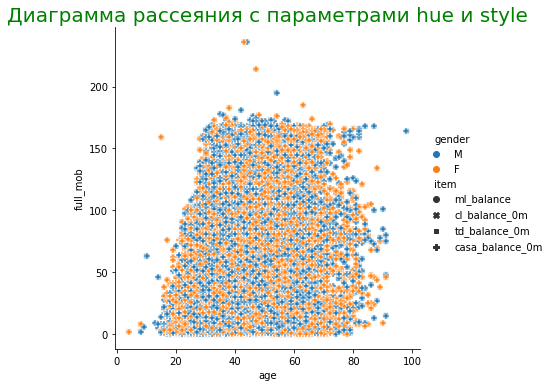

In [16]:
prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]
sns.relplot(x='age', y='full_mob', hue='gender', style='item', markers=True,
            data=prd)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

#### Диаграмма рассеяния с параметром Hue и дополнительными переменными

<ipython-input-18-5035e755ea1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd['values'] = prd['values'].apply(lambda x: 0 if np.isnan(x) or x == 0.0 else 1)


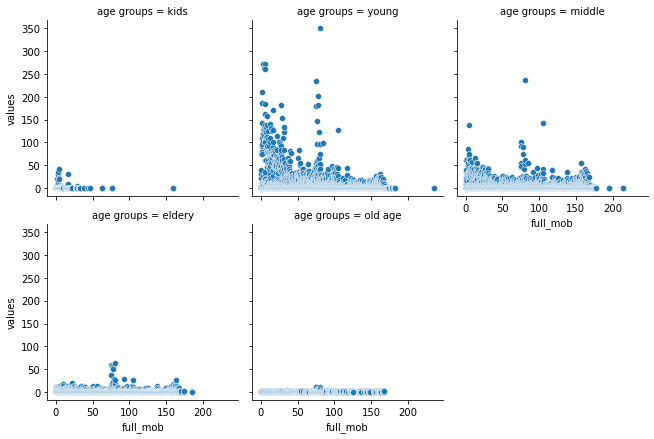

In [18]:
prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]
prd['values'] = prd['values'].apply(lambda x: 0 if np.isnan(x) or x == 0.0 else 1)
prd = prd.groupby(['full_mob', 'age groups', 'city_type', 'item'])['values'].sum().reset_index()

age_order = ['kids', 'young', 'middle', 'eldery', 'old age']
sns.relplot(
    x='full_mob',
    y='values',
    col='age groups',
    col_wrap=3,
    col_order=age_order,
    data=prd,
    height=3
);

## Категорийные диаграммы, sns.catplot()
- stripplot() and swarmplot()
- boxplot() and boxnplot()
- barplot() and countplot()
- violinplot()
- pointplot()


* stripplot(), kind='strip' 
* swarmplot(), kind='swarm'

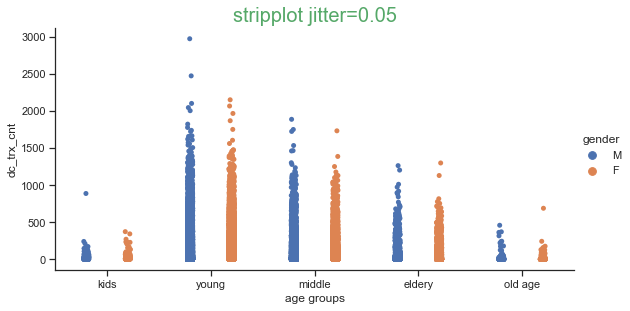

In [20]:
sns.set(style="ticks", color_codes=True)

age_order = ['kids', 'young', 'middle', 'eldery', 'old age']
sns.catplot(
    x='age groups',
    y='dc_trx_cnt', 
    data=df, 
    hue='gender',    # оба на одном графике разными цветами
    order=age_order, 
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

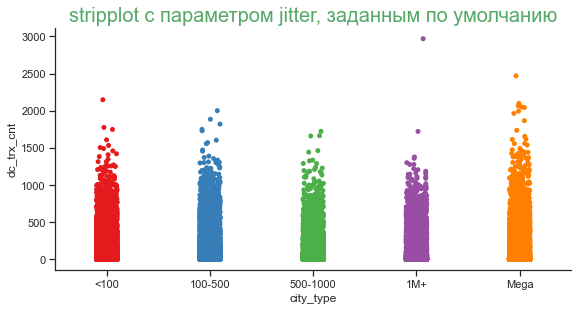

In [22]:
sns.catplot(
    x='city_type',
    y='dc_trx_cnt', #количество трат по картам
    data=df, 
    order=['<100', '100-500', '500-1000', '1M+', 'Mega'],
    palette='Set1', 
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

In [31]:
df['city_type'].unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

<ipython-input-95-335e24472a2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd1['values'] = prd1['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
<ipython-input-95-335e24472a2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd1.dropna(inplace=True)
/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/annavelikobratova/miniconda3/lib/python

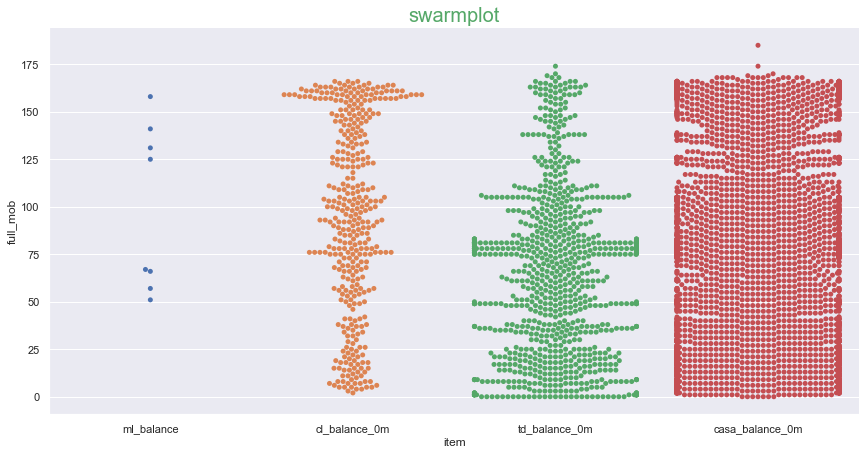

In [95]:
prd1 = prd[prd['age groups'].isin(['eldery'])]
prd1['values'] = prd1['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
prd1.dropna(inplace=True)

sns.catplot(
    x='item',
    y='full_mob', 
    data=prd1,
    kind='swarm',
    height=6, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

In [90]:
prd1

,age,gender,city_type,full_mob,age groups,item,values
151244,85,F,100-500,104,old age,td_balance_0m,1.0
151344,88,М,<100,27,old age,td_balance_0m,1.0
151366,78,М,100-500,1,old age,td_balance_0m,1.0
151484,77,F,Mega,97,old age,td_balance_0m,1.0
151507,78,F,500-1000,49,old age,td_balance_0m,1.0
...,...,...,...,...,...,...,...
249408,81,F,<100,93,old age,casa_balance_0m,1.0
249619,91,М,100-500,15,old age,casa_balance_0m,1.0
249793,75,F,500-1000,37,old age,casa_balance_0m,1.0
249886,78,М,<100,64,old age,casa_balance_0m,1.0


### boxplot(), kind='box'
### boxnplot(), kind='boxn'

In [96]:
dfn = df.copy()
dfn['cl_balance_0m'] = dfn['cl_balance_0m']/dfn['cl_balance_0m'].mean()
dfn['ml_balance'] = dfn['ml_balance']/dfn['ml_balance'].mean()
dfn['td_balance_0m'] = dfn['td_balance_0m']/dfn['td_balance_0m'].mean()
dfn['casa_balance_0m'] = dfn['casa_balance_0m']/dfn['casa_balance_0m'].mean()
lt = pd.melt(dfn, var_name='item', value_name='values',
            id_vars=['age','gender','city_type', 'full_mob', 'age groups'])

prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]

#prd['values'] = prd['values'].apply(lambda x: 0 if np.isnan(x) or x == 0.0 else 1)
#prd = prd.groupby(['full_mob', 'age groups', 'city_type', 'item'])['values'].sum().reset_index()

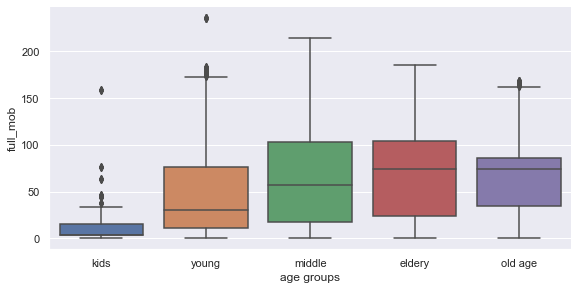

In [97]:
#prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]
age_order = ['kids', 'young', 'middle', 'eldery', 'old age']
#city_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.catplot(
    x='age groups', 
    y='full_mob', 
    data=prd, 
    kind='box', 
    height=4,
    order = age_order,
    aspect=2
); 

<ipython-input-99-f7cd8253ede4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_y['values'] = prd_y['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
<ipython-input-99-f7cd8253ede4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_y.dropna(inplace=True)


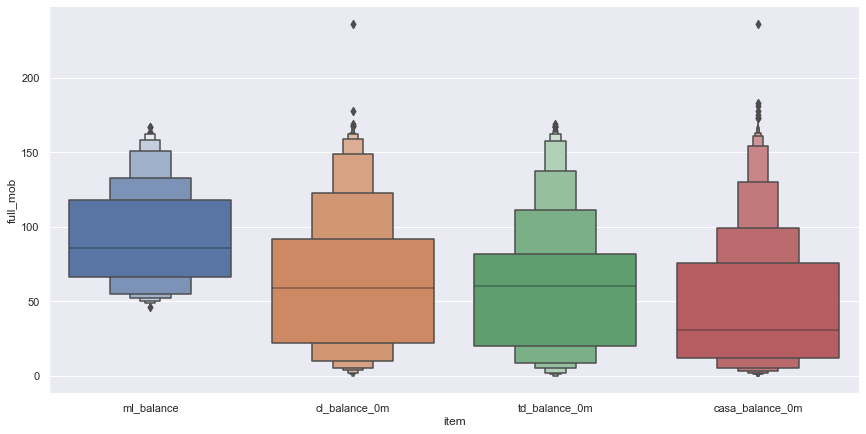

In [99]:
prd_y = prd[prd['age groups'].isin(['young'])]
prd_y['values'] = prd_y['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
prd_y.dropna(inplace=True)

sns.catplot(
    x='item',
    y='full_mob', 
    data=prd_y, 
    kind='boxen', 
    height=6, 
    aspect=2); 

### barplot(), kind='bar'

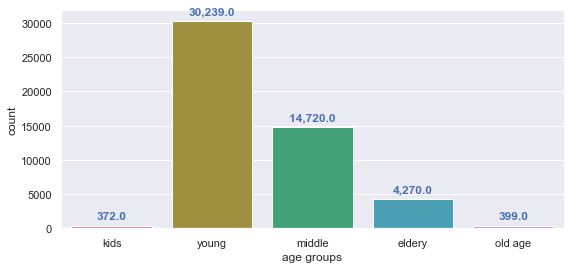

In [103]:
cnt_df = df.groupby(['age groups'])['city_type'].count().rename('count').reset_index()
age_order = ['kids', 'young', 'middle', 'eldery', 'old age']
plt.figure(figsize=(9,4))
b = sns.barplot(
    x='age groups', 
    y='count',
    data=cnt_df,
    order=age_order,
    palette='husl')

sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

<ipython-input-117-c07847ed1510>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_y['values'] = prd_y['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
<ipython-input-117-c07847ed1510>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_y.dropna(inplace=True)


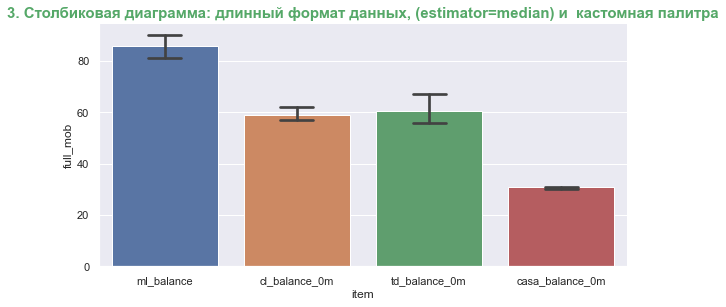

In [117]:
from numpy import median
prd_y = prd[prd['age groups'].isin(['young'])]
prd_y['values'] = prd_y['values'].apply(lambda x: np.nan if np.isnan(x) or x == 0.0 else 1)
prd_y.dropna(inplace=True)

b = sns.catplot(
    x='item',
    y='full_mob', 
    data=prd_y,
    kind='bar', 
    estimator=median, 
    capsize=0.25, 
    height=4, 
    aspect=2)

#b.set(yscale='log', ylim=[50000, 1000000])
#sns.despine()

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

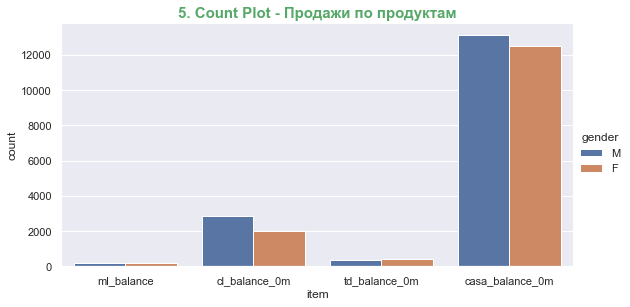

In [122]:
# Count Plot показывает количество наблюдений

sns.catplot(x='item', 
            data=prd_y, 
            kind='count', 
            hue='gender', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

### violinplot(), kind='violin'

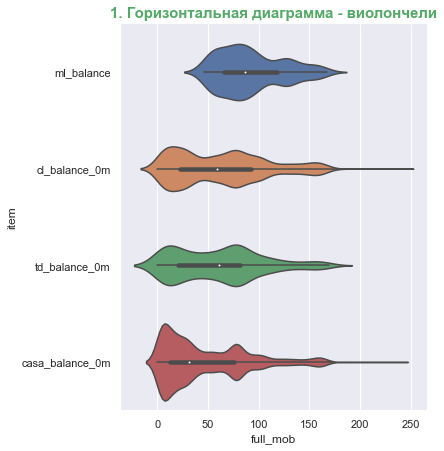

In [127]:
sns.catplot(
    y='item',
    x='full_mob', 
    data=prd_y,
    kind='violin',
    height=6,
    aspect=1)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

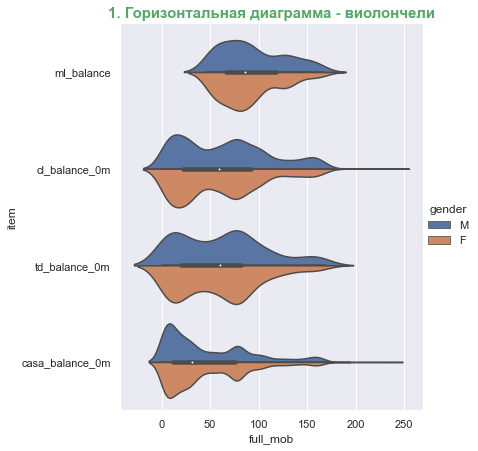

In [129]:
sns.catplot(
    y='item',
    x='full_mob', 
    data=prd_y,
    kind='violin',
    hue='gender',
    split=True, 
    height=6,
    aspect=1)
plt.title('2. Горизонтальная диаграмма - виолончели, объединение по hue', size=15, color='g', weight='bold');

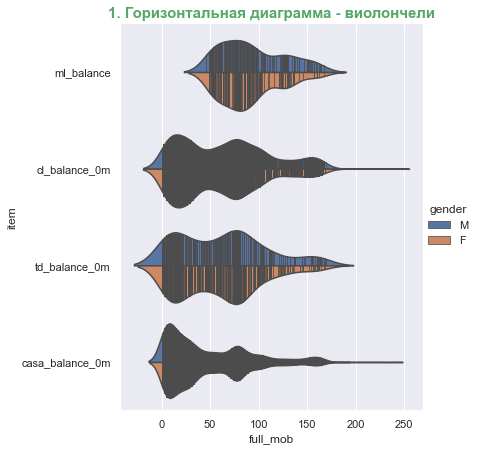

In [131]:
sns.catplot(
    y='item',
    x='full_mob', 
    data=prd_y,
    kind='violin',
    hue='gender',
    split=True, 
    inner='stick',
    height=6,
    aspect=1)
plt.title('3. Виолончели с параметрами hue=Promotion, split=True, inner=stick', size=15, color='g', weight='bold');

### pointplot(), kind='point'

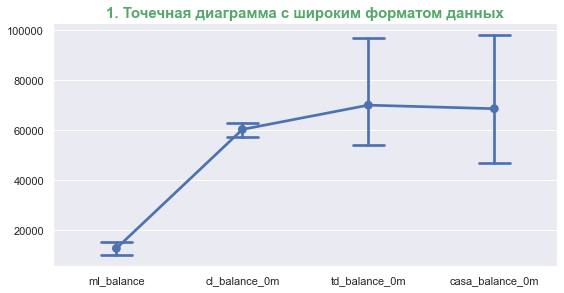

In [140]:
df1 = df[['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m']].copy()

sns.catplot(
    data=df1,     # wide form df
    kind='point', 
    ci=99.99, 
    capsize=0.25, 
    height=4,        
    aspect=2
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

In [135]:
df1

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age groups
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,eldery
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,middle
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539,middle
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,middle
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,eldery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155,middle
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438,middle
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710,young
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269,young


### distplot() and rugplot()

/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


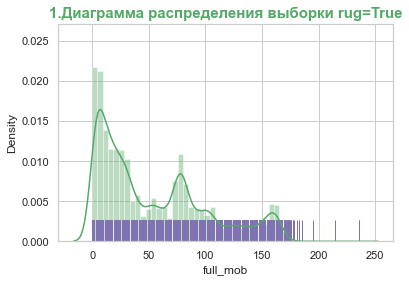

In [144]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df['full_mob'],
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения выборки rug=True', size=15, color='g', weight='bold')
plt.show();

/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/annavelikobratova/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


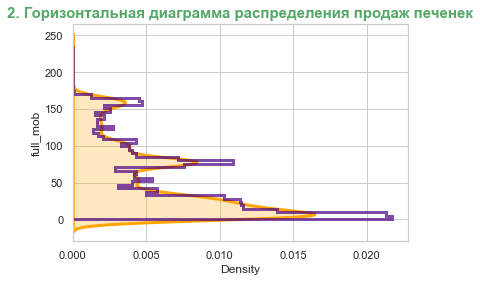

In [143]:
sns.distplot(
    df['full_mob'],
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

### pairplot() 

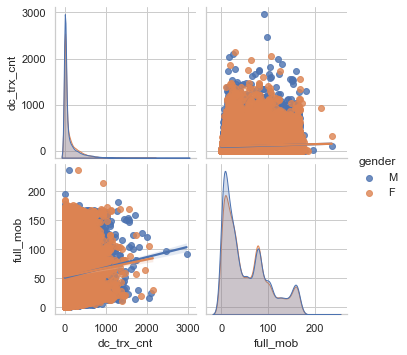

In [153]:
df_items = df.loc[:,['dc_trx_cnt', 'full_mob', 'gender']]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg')
plt.show();

### PairGrid()

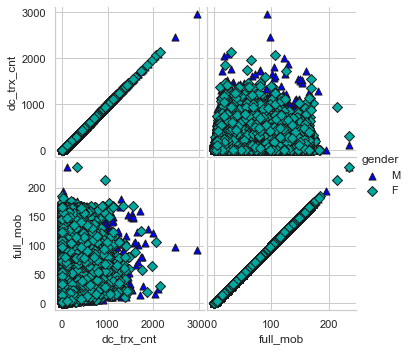

In [158]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}, 
    palette={'М': 'blue', 'F': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

## Матричные диаграммы
- heatmap()
- clustermap()

### Heatmap

In [174]:
dfn = df.copy()
dfn['cl_balance_0m'] = dfn['cl_balance_0m']/dfn['cl_balance_0m'].mean()
dfn['ml_balance'] = dfn['ml_balance']/dfn['ml_balance'].mean()
dfn['td_balance_0m'] = dfn['td_balance_0m']/dfn['td_balance_0m'].mean()
dfn['casa_balance_0m'] = dfn['casa_balance_0m']/dfn['casa_balance_0m'].mean()
lt = pd.melt(dfn, var_name='item', value_name='values',
            id_vars=['age','gender','city_type', 'full_mob', 'age groups'])

prd = lt[lt['item'].isin(['ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m'])]
trn = prd.groupby(['age groups', 'item']).values.mean()
trn = trn.reset_index()
trn = trn.pivot('age groups','item', 'values')

Text(0.5, 1.0, 'Используем предопредленный цветовую шкалу')

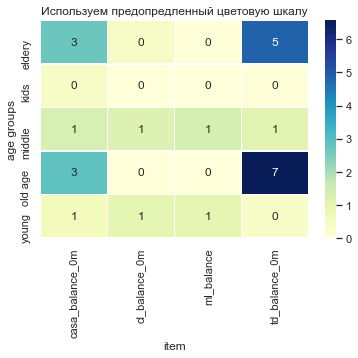

In [177]:
g = sns.heatmap(
    trn, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu")
g.set_title('Используем предопредленный цветовую шкалу')

### Clustermaps

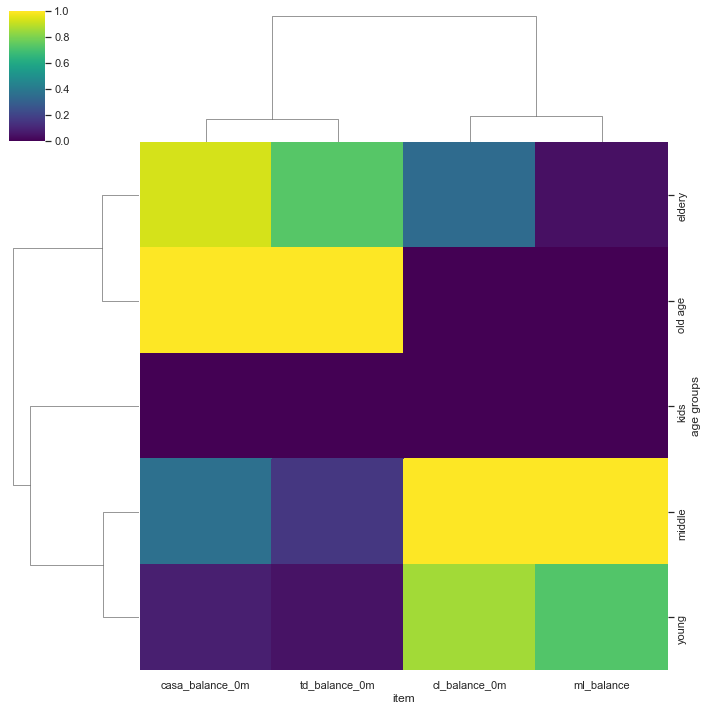

In [178]:
g = sns.clustermap(
    trn, 
    standard_scale=1, 
    robust=True,
    cmap='viridis')